In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
# import pickle

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [78]:
def Shannon_entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log2(Pdf_safe))

def KLD(P, Q):
    """
    Kullback-Leibler divergence between two probability distributions P and Q.

    """
    P = np.where(P > 0, P, np.finfo(float).eps)
    Q = np.where(Q > 0, Q, np.finfo(float).eps)
    
    kld = np.nansum(P * np.log2(P/Q), axis=0)
    
    return kld

def JSD(P, Q):
    """
    Jensen-Shannon divergence between two probability distributions P and Q.

    """
    P = np.where(P > 0, P, np.finfo(float).eps)
    Q = np.where(Q > 0, Q, np.finfo(float).eps)
    
    M = 0.5 * (P + Q)
    jsd = 0.5 * KLD(P, M) + 0.5 * KLD(Q, M)
    
    return jsd

In [79]:
location = 'Cape_Hatteras'
delta_r = 0.1
subset = 1

week = 12
member = 1

file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_all/P_dr{delta_r*100:03.0f}_all_s{subset}.nc"
P_AX = xr.open_dataset(file_path_AX)
P_AX = P_AX.sortby('hexint')

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.nc"
P_m = xr.open_dataset(file_path)
P_m = P_m.sortby('hexint')

    

In [71]:
M = (P_AX['probability'] + P_m['probability'])/2
M = M.values

In [72]:
hex_grid = hexfunc.int_to_hex(P_AX.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

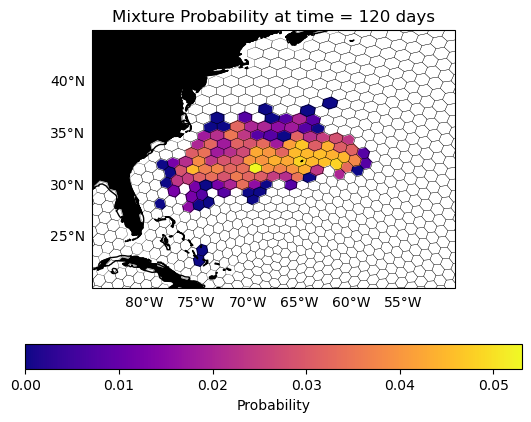

In [73]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
ax.coastlines()

ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
gl = ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5, alpha=0.)
gl.top_labels = False
gl.right_labels = False

t = 120
t_gap = 0

im = hexbin_grid.pcolorhex(M[:, t], ax=ax, cmap='plasma', draw_edges=True)
ax.set_title(f'Mixture Probability at time = {t} days')


cbar = plt.colorbar(im, ax=ax, orientation='horizontal', label=f'Probability')


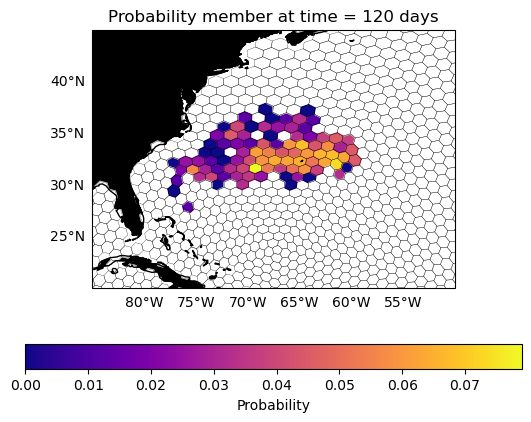

In [74]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
ax.coastlines()

ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
gl = ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5, alpha=0.)
gl.top_labels = False
gl.right_labels = False

t = 120
t_gap = 0

im = hexbin_grid.pcolorhex(P_m.probability[:, t], ax=ax, cmap='plasma', draw_edges=True)
ax.set_title(f'Probability member at time = {t} days')


cbar = plt.colorbar(im, ax=ax, orientation='horizontal', label=f'Probability')


In [76]:
JSD = 0.5*KLD(P_AX['probability'].values, M) + 0.5*KLD(P_m['probability'].values, M)

In [83]:
jsd_1 = JSD(P_m['probability'].values, P_AX['probability'].values)
kld_1 = KLD(P_m['probability'].values, P_AX['probability'].values)

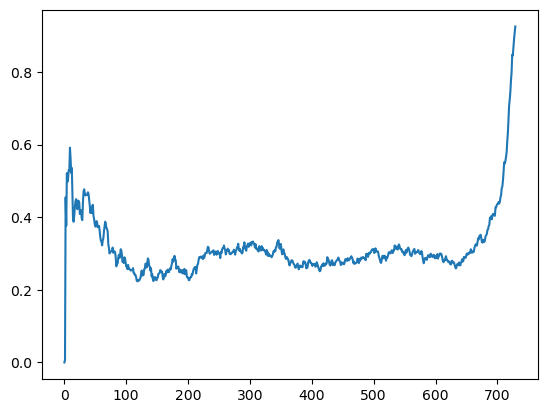

In [85]:
plt.plot(jsd_1)


# Jensen Shannon Divergence all members